In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [204]:
df = pd.read_csv('C:/Users/sumit/Desktop/ISB/Classwork/Python/Assignment/Indian_cities.csv')
display(df)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [205]:
df.shape

(493, 22)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [207]:
df.isnull().sum() 

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [208]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [209]:
df['state_name'].unique()

array(['PUNJAB', 'MAHARASHTRA', 'ANDHRA PRADESH', 'JHARKHAND', 'TRIPURA',
       'UTTAR PRADESH', 'GUJARAT', 'MIZORAM', 'RAJASTHAN', 'TAMIL NADU',
       'KERALA', 'HARYANA', 'CHHATTISGARH', 'JAMMU & KASHMIR', 'BIHAR',
       'WEST BENGAL', 'KARNATAKA', 'ORISSA', 'MADHYA PRADESH',
       'NCT OF DELHI', 'CHANDIGARH', 'UTTARAKHAND', 'ASSAM', 'NAGALAND',
       'MANIPUR ', 'PUDUCHERRY', 'ANDAMAN & NICOBAR ISLANDS', 'MEGHALAYA',
       'HIMACHAL PRADESH'], dtype=object)

In [210]:
df['state_name'].value_counts()

state_name
UTTAR PRADESH                63
WEST BENGAL                  61
MAHARASHTRA                  43
ANDHRA PRADESH               42
MADHYA PRADESH               32
TAMIL NADU                   32
GUJARAT                      29
RAJASTHAN                    29
BIHAR                        26
KARNATAKA                    26
HARYANA                      20
PUNJAB                       16
NCT OF DELHI                 15
ORISSA                       10
JHARKHAND                    10
CHHATTISGARH                  9
KERALA                        7
UTTARAKHAND                   6
ASSAM                         4
JAMMU & KASHMIR               3
PUDUCHERRY                    2
MANIPUR                       1
MEGHALAYA                     1
ANDAMAN & NICOBAR ISLANDS     1
CHANDIGARH                    1
NAGALAND                      1
TRIPURA                       1
MIZORAM                       1
HIMACHAL PRADESH              1
Name: count, dtype: int64

In [211]:
df_totalP = df.groupby('state_name').sum()  # This will group Total population statewise 
df_totalP

,name_of_city,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
state_name,,,,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,Port Blair,35,3,100608,53247,47361,9358,4852,4506,81908,...,37000,889,929,89.76,92.79,86.34,"11.6233774,92.7264828",12420,6717,5703
ANDHRA PRADESH,Adilabad Adoni Anantapur Bhimavaram Chilakalur...,1176,707,18171615,9192368,8979247,1776846,913593,863253,13463769,...,6285081,41975,39630,3398.97,3644.80,3154.26,"19.0809075,79.56034415.6322227,77.272836814.68...",2751351,1668337,1083014
ASSAM,Dibrugarh Guwahati Nagaon Silchar,72,57,1391154,720132,671022,125523,62882,62641,1154871,...,540916,3803,3931,366.05,377.63,353.88,"27.4728327,94.911962126.1445169,91.736236526.3...",242490,140832,101658
BIHAR,Arrah Aurangabad Bagaha Begusarai Bettiah Bhag...,260,521,6714516,3558722,3155794,881486,465151,416335,4778390,...,2097892,23085,23363,2102.56,2241.87,1945.48,"25.5560443,84.660330724.7457189,84.380488827.1...",890106,602353,287753
CHANDIGARH,Chandigarh,4,1,960787,525226,435561,104192,56020,48172,743254,...,317183,829,860,86.77,90.81,81.88,"30.7333148,76.7794179",189312,101491,87821
CHHATTISGARH,Ambikapur Bhilai Nagar Bilaspur Durg Jagdalpur...,198,73,3137918,1612019,1525899,364621,189496,175125,2413475,...,1092429,8552,8291,784.25,837.05,728.90,"23.1354921,83.181785621.1938475,81.350941622.0...",450245,256774,193471
GUJARAT,Ahmadabad Amreli Anand Bharuch Bhavnagar Bhuj ...,696,322,17835049,9541688,8293361,1906363,1035073,871290,14154728,...,6233457,26482,24837,2532.54,2679.19,2373.05,"23.022505,72.571362121.6031774,71.222083222.56...",1994347,1130740,863607
HARYANA,Ambala Ambala Sadar Bahadurgarh Bhiwani Farida...,120,191,5952223,3181968,2770255,690943,377623,313320,4484676,...,1959889,17516,16454,1705.06,1801.43,1595.74,"30.3781788,76.776697430.3248708,76.843266328.6...",1059274,577921,481353
HIMACHAL PRADESH,Shimla,2,11,169758,93364,76394,13646,7221,6425,147799,...,65313,818,890,94.67,95.75,93.35,"31.1048145,77.1734033",43353,23822,19531


In [212]:
new_df=pd.DataFrame(eval('df_totalP'))
display(new_df)

,name_of_city,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
state_name,,,,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,Port Blair,35,3,100608,53247,47361,9358,4852,4506,81908,...,37000,889,929,89.76,92.79,86.34,"11.6233774,92.7264828",12420,6717,5703
ANDHRA PRADESH,Adilabad Adoni Anantapur Bhimavaram Chilakalur...,1176,707,18171615,9192368,8979247,1776846,913593,863253,13463769,...,6285081,41975,39630,3398.97,3644.80,3154.26,"19.0809075,79.56034415.6322227,77.272836814.68...",2751351,1668337,1083014
ASSAM,Dibrugarh Guwahati Nagaon Silchar,72,57,1391154,720132,671022,125523,62882,62641,1154871,...,540916,3803,3931,366.05,377.63,353.88,"27.4728327,94.911962126.1445169,91.736236526.3...",242490,140832,101658
BIHAR,Arrah Aurangabad Bagaha Begusarai Bettiah Bhag...,260,521,6714516,3558722,3155794,881486,465151,416335,4778390,...,2097892,23085,23363,2102.56,2241.87,1945.48,"25.5560443,84.660330724.7457189,84.380488827.1...",890106,602353,287753
CHANDIGARH,Chandigarh,4,1,960787,525226,435561,104192,56020,48172,743254,...,317183,829,860,86.77,90.81,81.88,"30.7333148,76.7794179",189312,101491,87821
CHHATTISGARH,Ambikapur Bhilai Nagar Bilaspur Durg Jagdalpur...,198,73,3137918,1612019,1525899,364621,189496,175125,2413475,...,1092429,8552,8291,784.25,837.05,728.90,"23.1354921,83.181785621.1938475,81.350941622.0...",450245,256774,193471
GUJARAT,Ahmadabad Amreli Anand Bharuch Bhavnagar Bhuj ...,696,322,17835049,9541688,8293361,1906363,1035073,871290,14154728,...,6233457,26482,24837,2532.54,2679.19,2373.05,"23.022505,72.571362121.6031774,71.222083222.56...",1994347,1130740,863607
HARYANA,Ambala Ambala Sadar Bahadurgarh Bhiwani Farida...,120,191,5952223,3181968,2770255,690943,377623,313320,4484676,...,1959889,17516,16454,1705.06,1801.43,1595.74,"30.3781788,76.776697430.3248708,76.843266328.6...",1059274,577921,481353
HIMACHAL PRADESH,Shimla,2,11,169758,93364,76394,13646,7221,6425,147799,...,65313,818,890,94.67,95.75,93.35,"31.1048145,77.1734033",43353,23822,19531


In [213]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, ANDAMAN & NICOBAR ISLANDS to WEST BENGAL
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    29 non-null     object 
 1   state_code                      29 non-null     int64  
 2   dist_code                       29 non-null     int64  
 3   population_total                29 non-null     int64  
 4   population_male                 29 non-null     int64  
 5   population_female               29 non-null     int64  
 6   0-6_population_total            29 non-null     int64  
 7   0-6_population_male             29 non-null     int64  
 8   0-6_population_female           29 non-null     int64  
 9   literates_total                 29 non-null     int64  
 10  literates_male                  29 non-null     int64  
 11  literates_female                29 non-null     int64  
 12  sex_ratio 

<Figure size 1000x600 with 0 Axes>

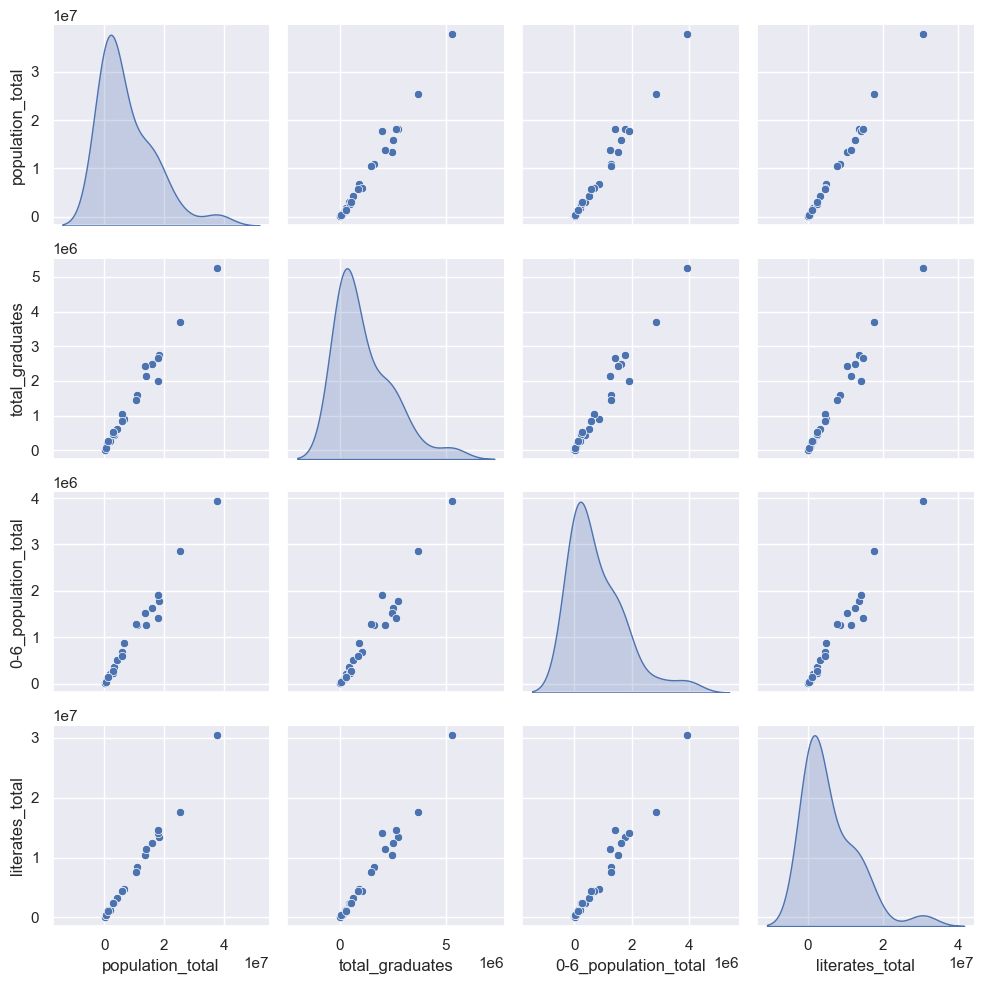

In [214]:
#Referred from Kaggle : This is will give the correlation details with different Numerical Columns 
df_plot_new_df = new_df[['population_total','total_graduates','0-6_population_total','literates_total']]

#plotting in seaborn
sns.set_style(style='darkgrid')
plt.figure(figsize = (10,6))
#sns.set_context(context ='notebook',font_scale=1);
sns.pairplot(df_plot_new_df,aspect=1,palette='Blues',diag_kind='kde');
plt.tight_layout();



In [215]:
#Correlation Between Total Populations vs Graduates vs 0-6 Population vs Literates 
df_plot_new_df = new_df[['population_total','total_graduates','0-6_population_total','literates_total']]
df_plot_new_df.corr()

,population_total,total_graduates,0-6_population_total,literates_total
population_total,1.000000,0.992288,0.991825,0.997483
total_graduates,0.992288,1.000000,0.982624,0.988545
0-6_population_total,0.991825,0.982624,1.000000,0.984313
literates_total,0.997483,0.988545,0.984313,1.000000


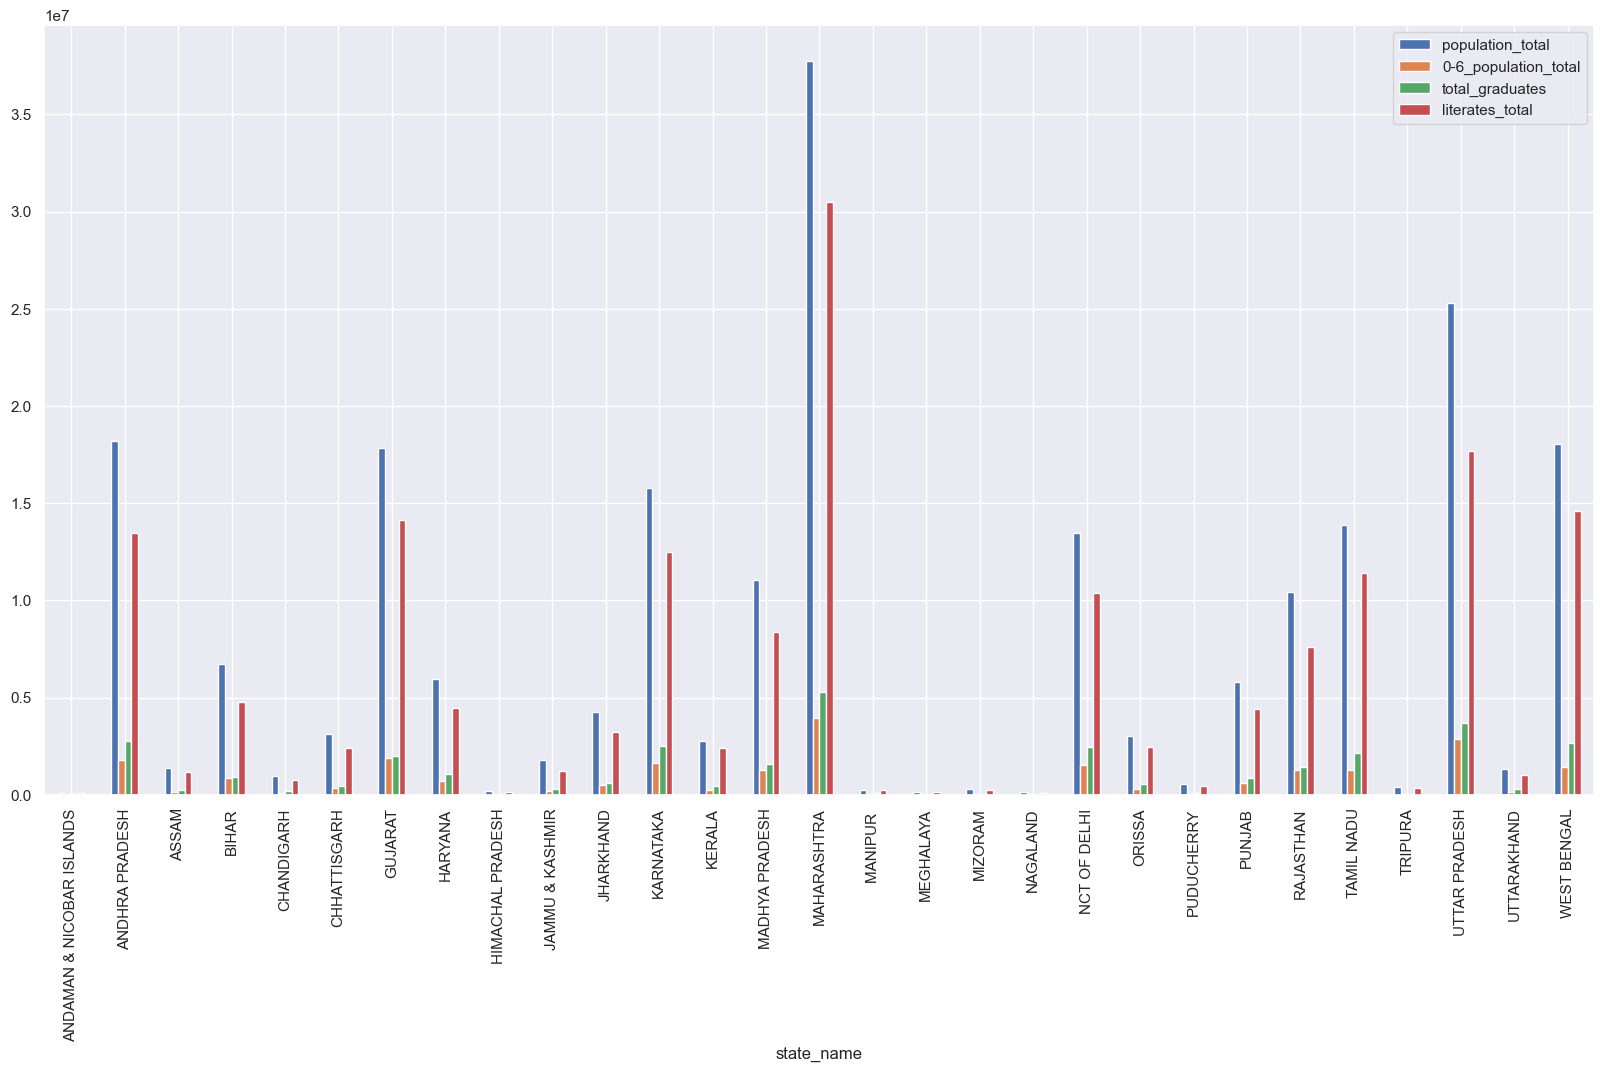

In [216]:
#StateWise Total (Populations vs Graduates Vs Literacy)
#Though Literacy rate is high People Graduating less as compared to Literacy rate in Maharashtra 
df_plot_new_df = new_df[['population_total','0-6_population_total','total_graduates','literates_total']]
#df_plot_new_df.plot.bar()
df_plot_new_df.plot(kind='bar', stacked=False, figsize=(20, 10))
plt.show()

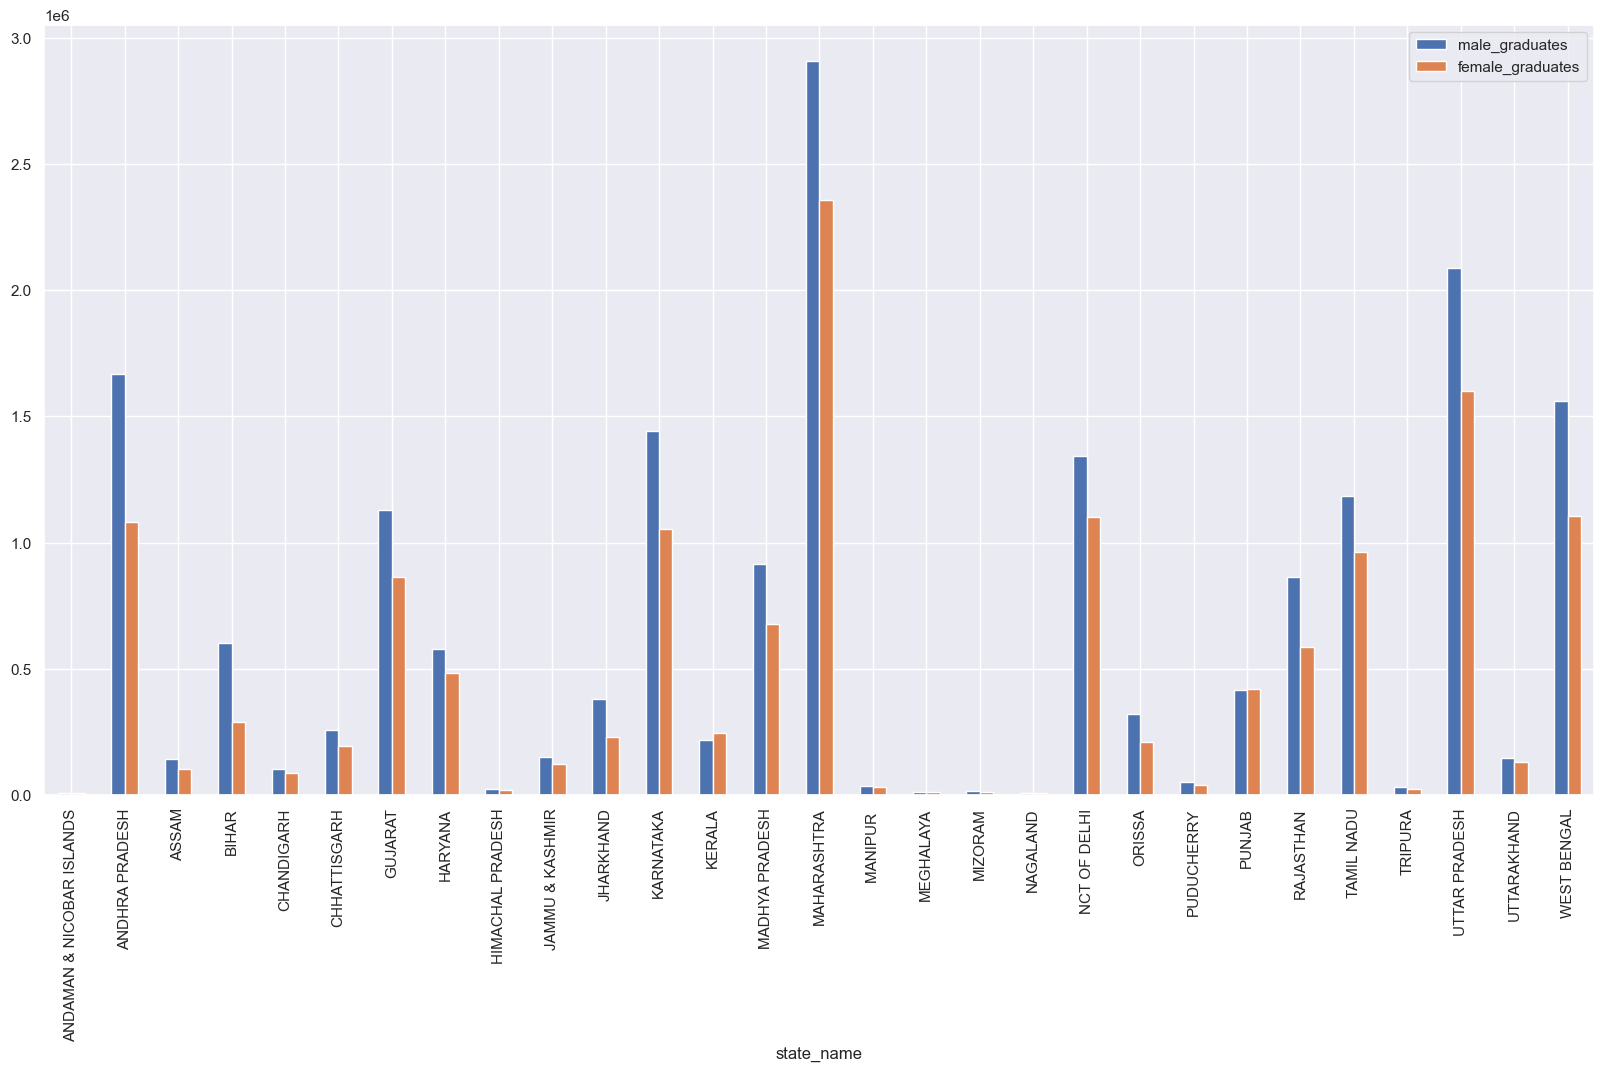

In [217]:
#Male vs Female Graduates Statewise 
df_plot_new_df = new_df[['male_graduates','female_graduates']]
#df_plot_new_df.plot.bar()
#Male vs Female Population Statewise
df_plot_new_df.plot(kind='bar', stacked=False, figsize=(20, 10))
plt.show()

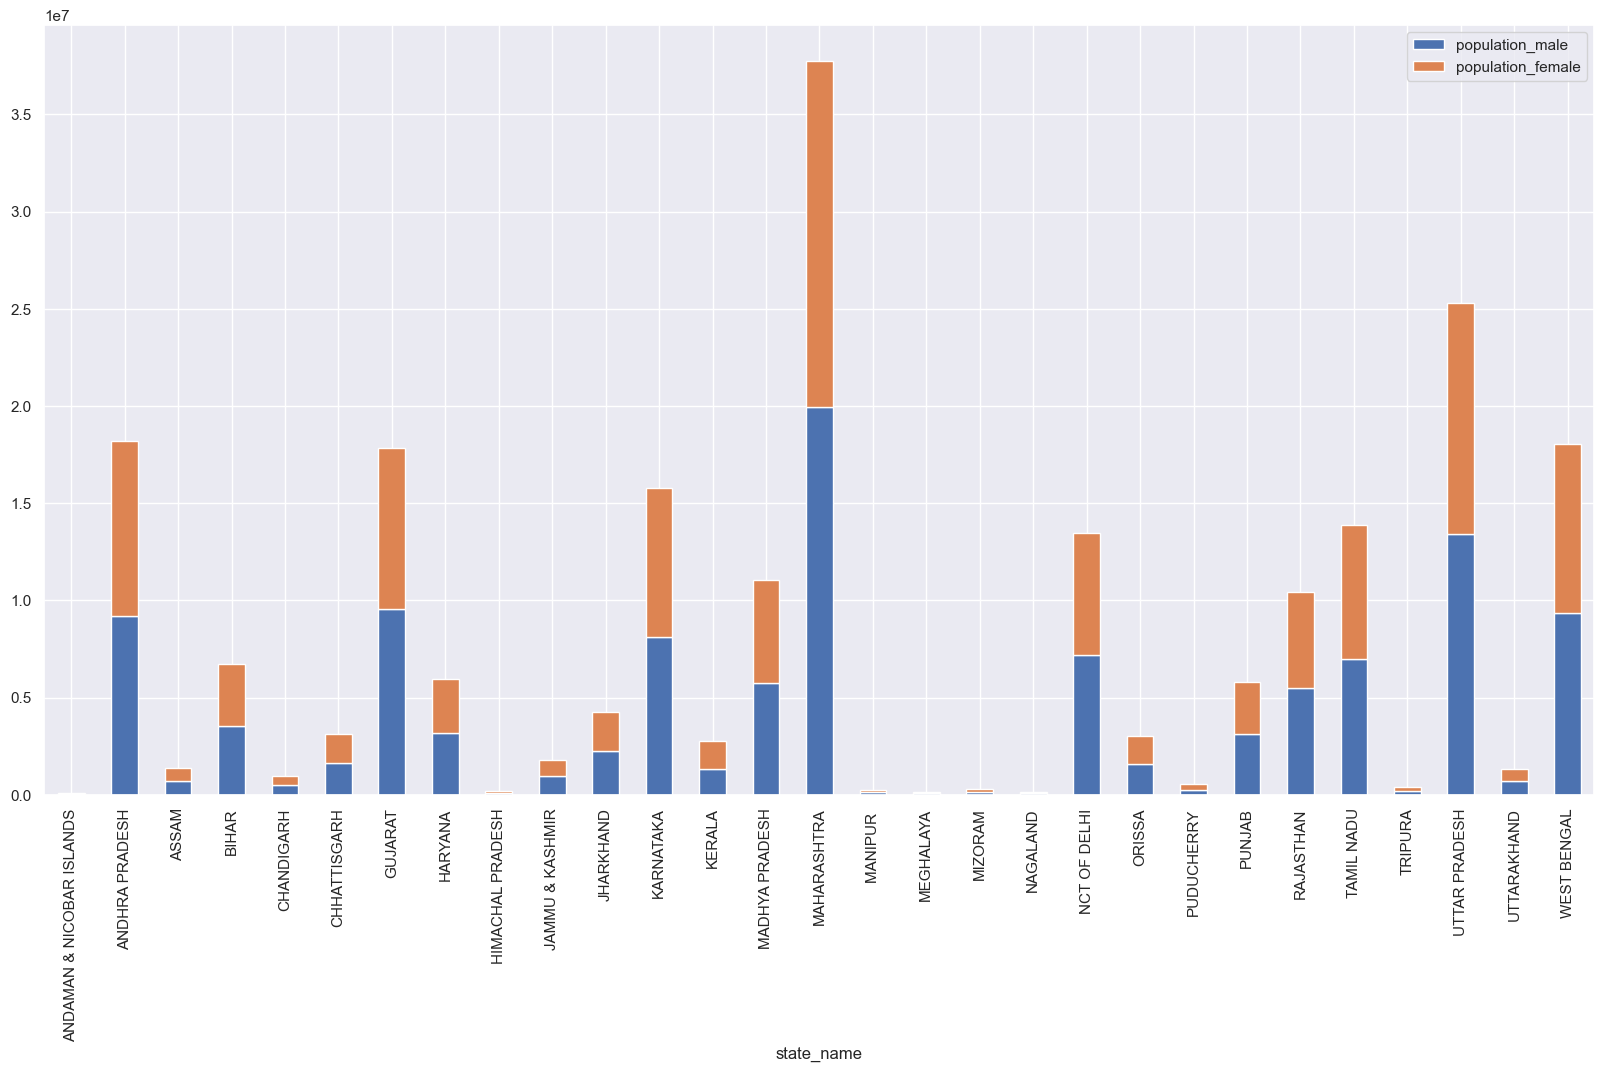

In [218]:
#Male vs Female Population Statewise 
df_plot_new_df = new_df[['population_male','population_female']]
#df_plot_new_df.plot.bar()
#Male vs Female Population Statewise
df_plot_new_df.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.show()

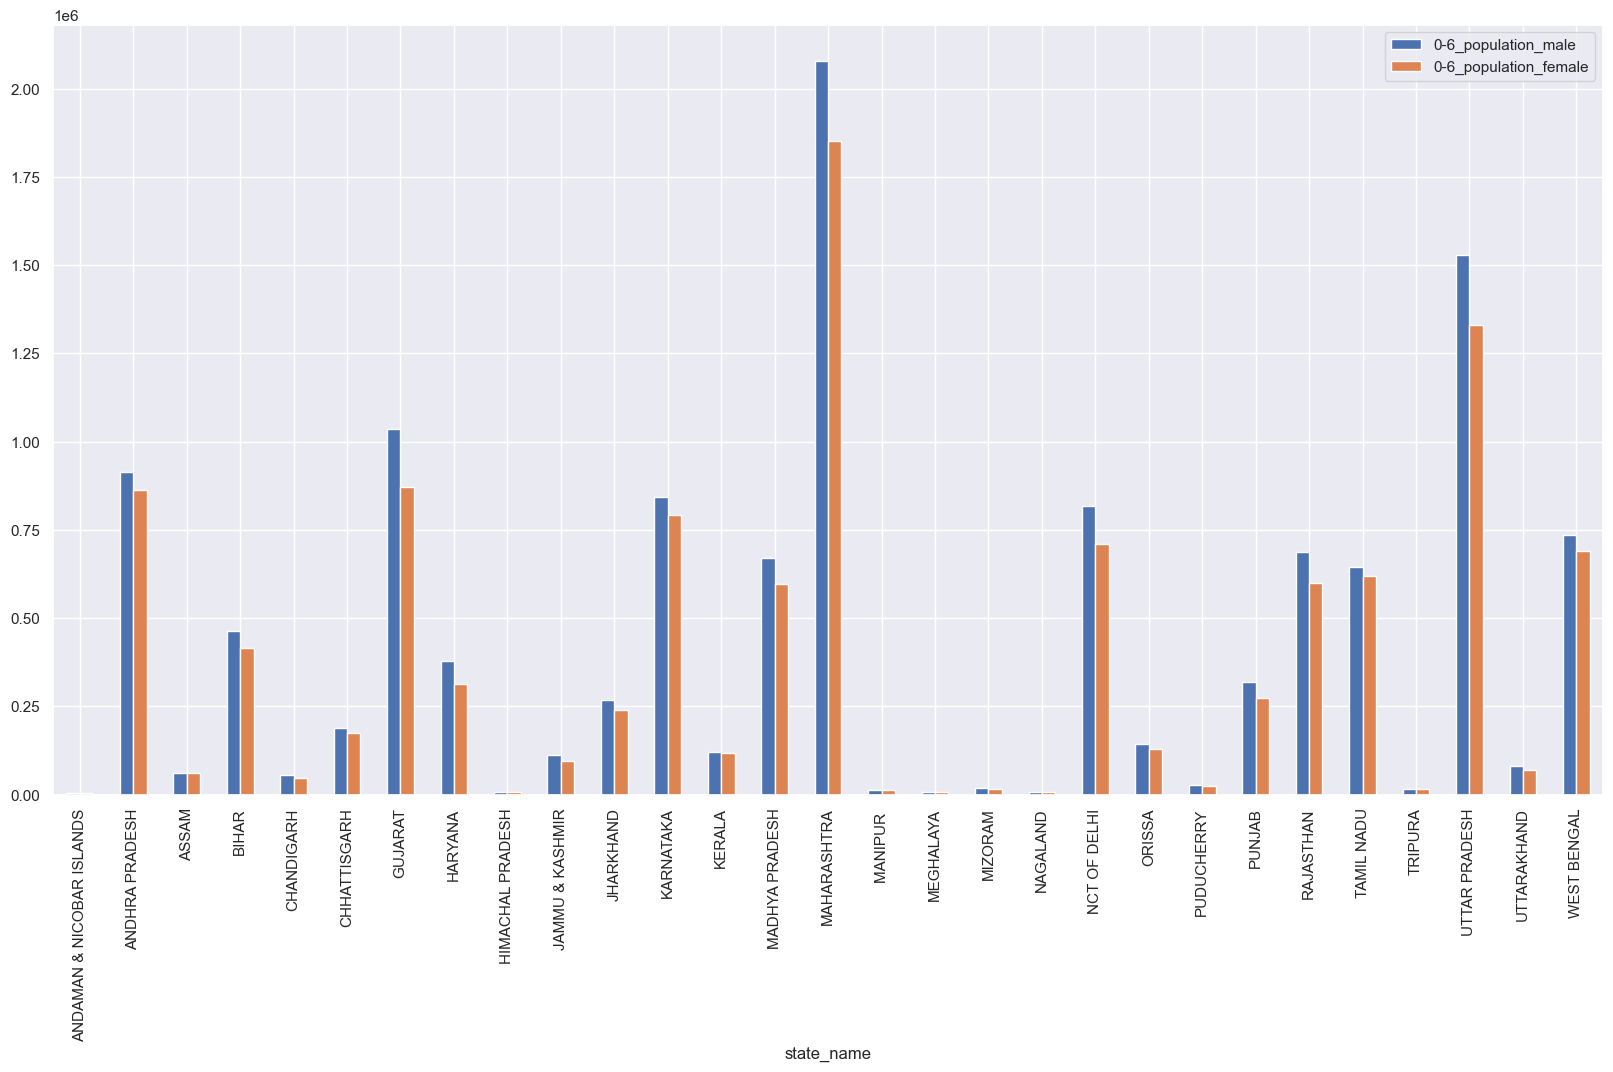

In [219]:
#0-6 Population male vs female (Assam an Kerala has approx male to female ratio)
df_plot_new_df = new_df[['0-6_population_male','0-6_population_female']]
#df_plot_new_df.plot.bar()
df_plot_new_df.plot(kind='bar', stacked=False, figsize=(20, 10))
plt.show()

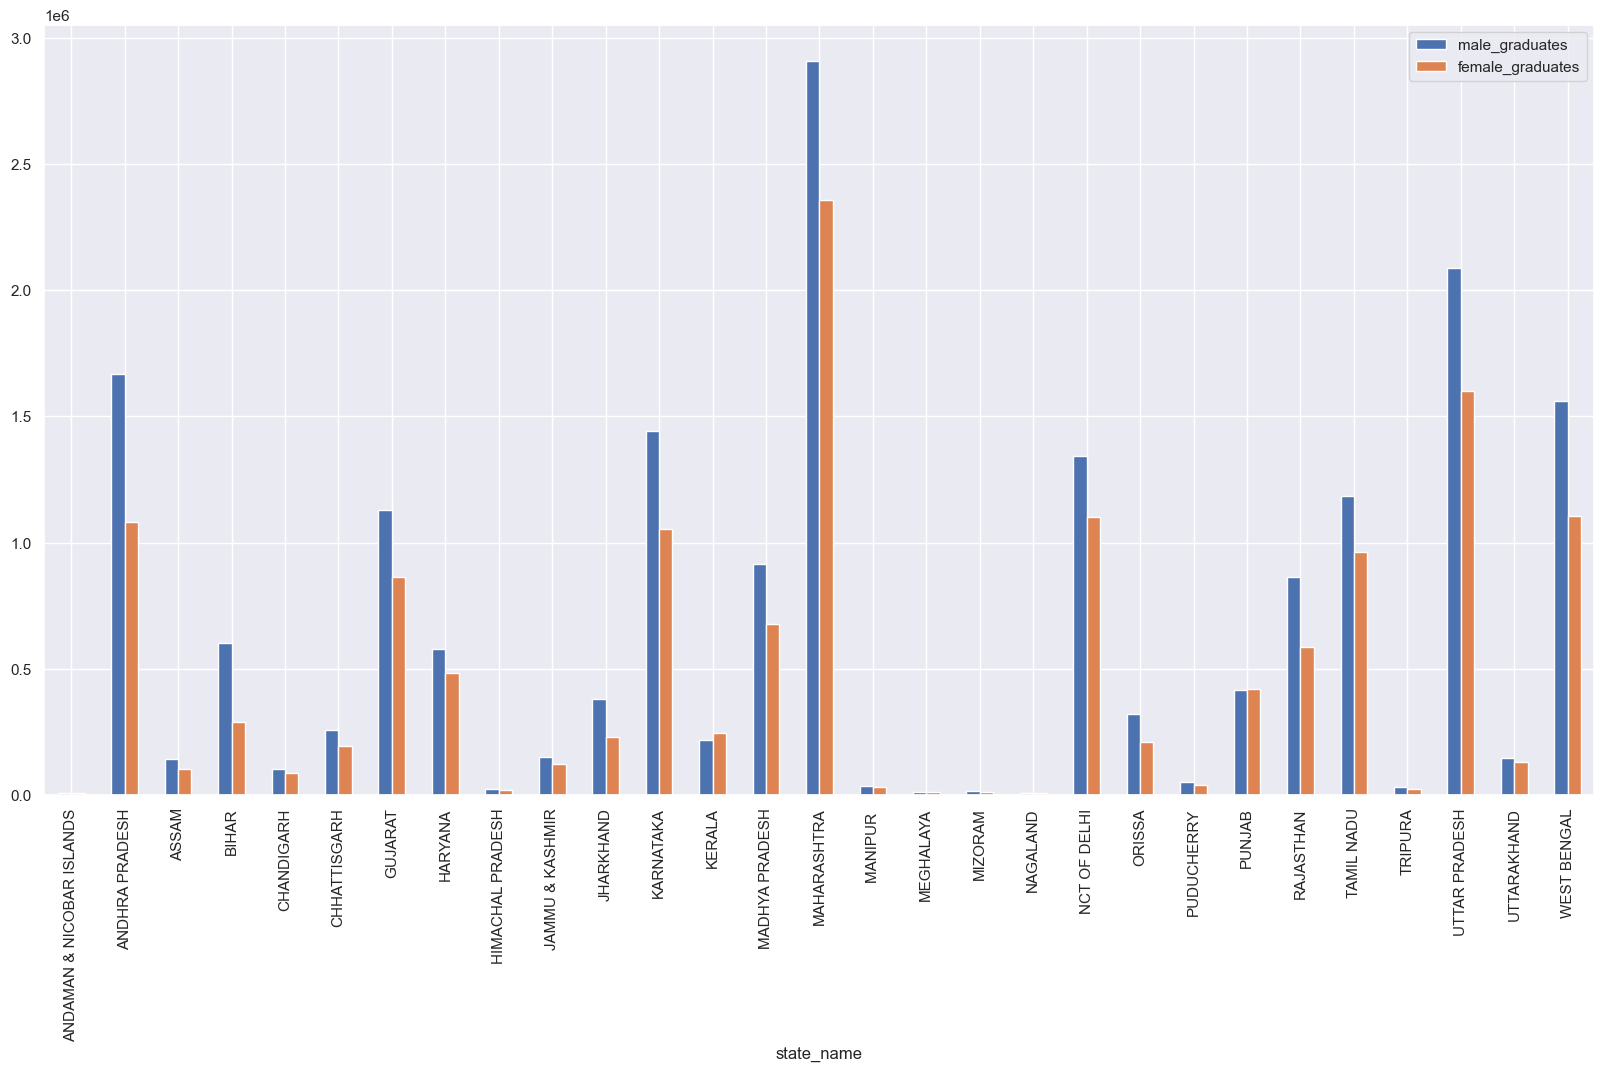

In [220]:
#Male Vs Female Graduation Data
df_plot_new_df = new_df[['male_graduates','female_graduates']]
#df_plot_new_df.plot.bar()
df_plot_new_df.plot(kind='bar', stacked=False, figsize=(20, 10))
plt.show()

In [221]:
new_df

,name_of_city,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
state_name,,,,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,Port Blair,35,3,100608,53247,47361,9358,4852,4506,81908,...,37000,889,929,89.76,92.79,86.34,"11.6233774,92.7264828",12420,6717,5703
ANDHRA PRADESH,Adilabad Adoni Anantapur Bhimavaram Chilakalur...,1176,707,18171615,9192368,8979247,1776846,913593,863253,13463769,...,6285081,41975,39630,3398.97,3644.80,3154.26,"19.0809075,79.56034415.6322227,77.272836814.68...",2751351,1668337,1083014
ASSAM,Dibrugarh Guwahati Nagaon Silchar,72,57,1391154,720132,671022,125523,62882,62641,1154871,...,540916,3803,3931,366.05,377.63,353.88,"27.4728327,94.911962126.1445169,91.736236526.3...",242490,140832,101658
BIHAR,Arrah Aurangabad Bagaha Begusarai Bettiah Bhag...,260,521,6714516,3558722,3155794,881486,465151,416335,4778390,...,2097892,23085,23363,2102.56,2241.87,1945.48,"25.5560443,84.660330724.7457189,84.380488827.1...",890106,602353,287753
CHANDIGARH,Chandigarh,4,1,960787,525226,435561,104192,56020,48172,743254,...,317183,829,860,86.77,90.81,81.88,"30.7333148,76.7794179",189312,101491,87821
CHHATTISGARH,Ambikapur Bhilai Nagar Bilaspur Durg Jagdalpur...,198,73,3137918,1612019,1525899,364621,189496,175125,2413475,...,1092429,8552,8291,784.25,837.05,728.90,"23.1354921,83.181785621.1938475,81.350941622.0...",450245,256774,193471
GUJARAT,Ahmadabad Amreli Anand Bharuch Bhavnagar Bhuj ...,696,322,17835049,9541688,8293361,1906363,1035073,871290,14154728,...,6233457,26482,24837,2532.54,2679.19,2373.05,"23.022505,72.571362121.6031774,71.222083222.56...",1994347,1130740,863607
HARYANA,Ambala Ambala Sadar Bahadurgarh Bhiwani Farida...,120,191,5952223,3181968,2770255,690943,377623,313320,4484676,...,1959889,17516,16454,1705.06,1801.43,1595.74,"30.3781788,76.776697430.3248708,76.843266328.6...",1059274,577921,481353
HIMACHAL PRADESH,Shimla,2,11,169758,93364,76394,13646,7221,6425,147799,...,65313,818,890,94.67,95.75,93.35,"31.1048145,77.1734033",43353,23822,19531


In [222]:
#Correlation between Literate Female vs 0-6 Population is Higher
corr=df['literates_female'].corr(df['0-6_population_total'])
print(corr)

0.983814564295358


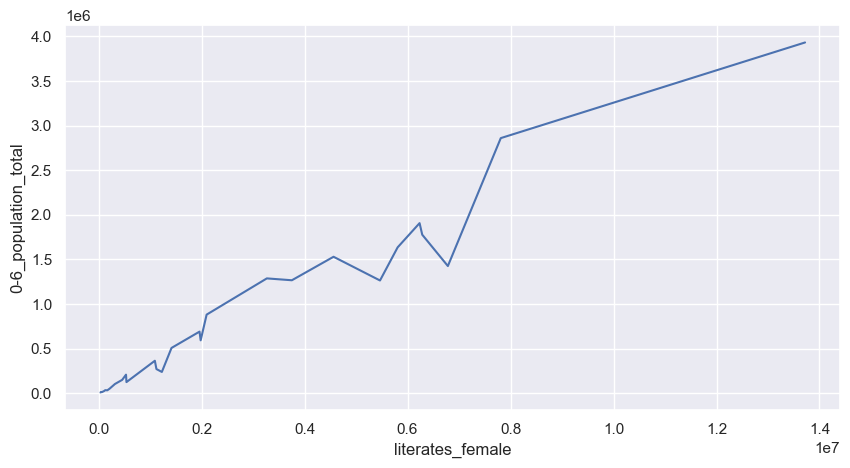

In [223]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=new_df,
            x=new_df['literates_female'],
            y=new_df['0-6_population_total'])
plt.show()

In [224]:
#Grad/Lit/Zero-Six Population percentage statewise 
new_df["Grad_Per"] = (new_df["total_graduates"] / new_df["population_total"] ) * 100

In [225]:
new_df["lit_Per"] = (new_df["literates_total"] / new_df["population_total"] ) * 100

In [226]:
new_df["ZS_Per"] = (new_df["0-6_population_total"] / new_df["population_total"] ) * 100

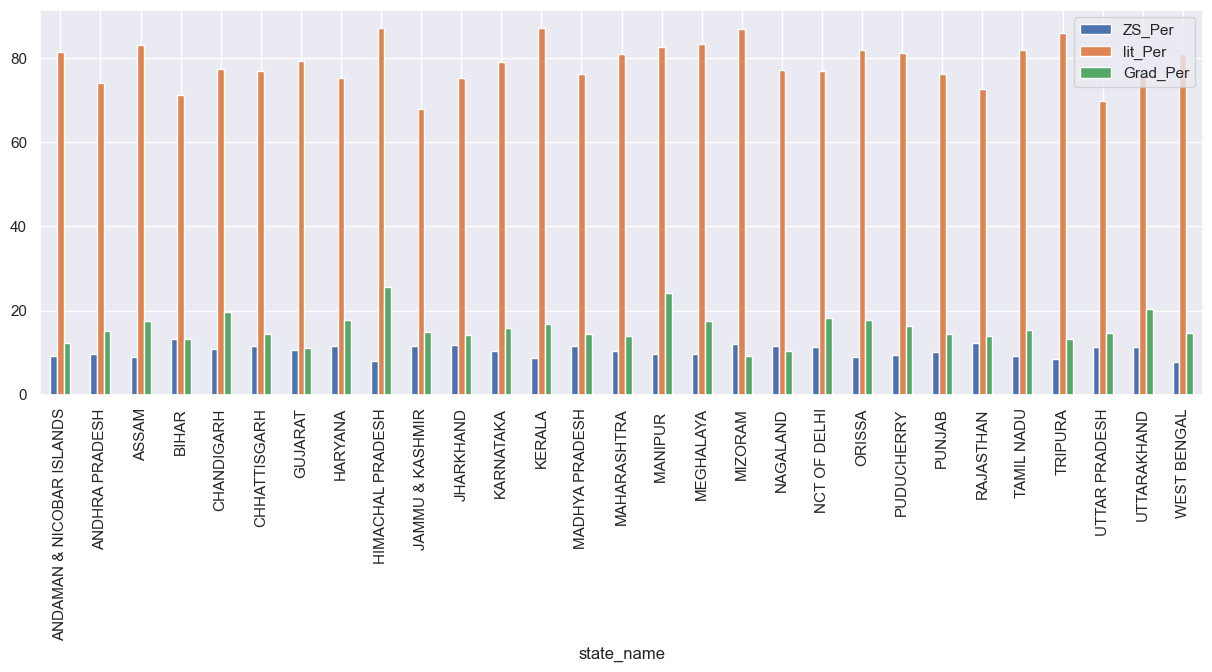

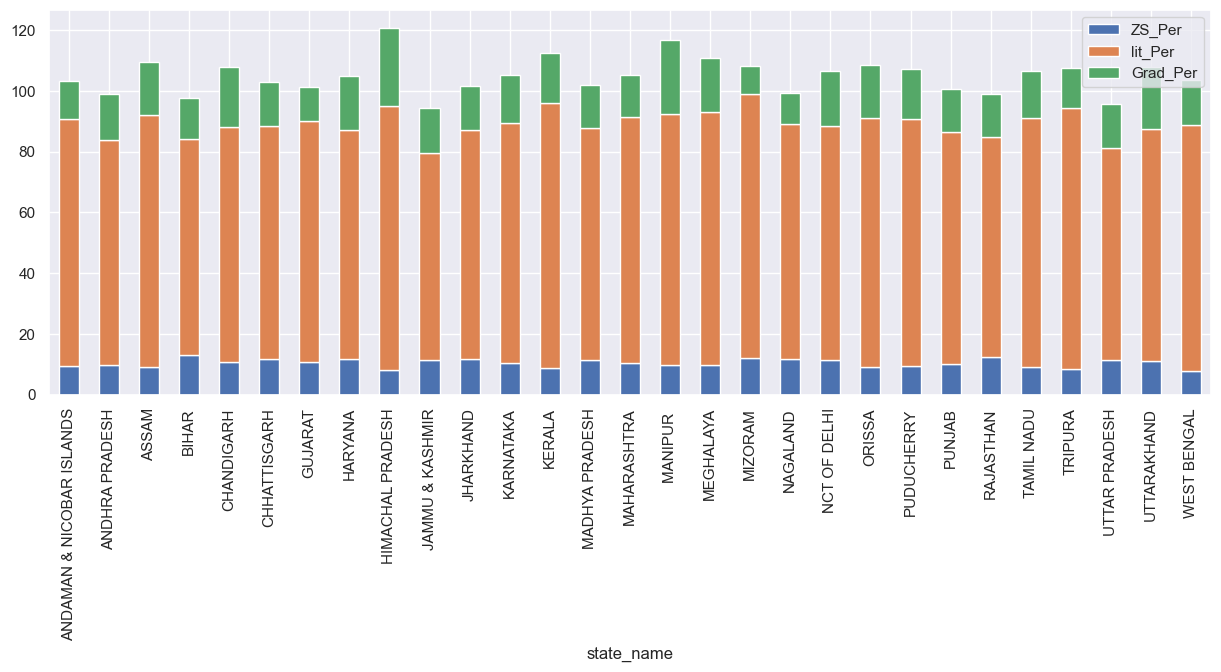

In [227]:
#Though Literacy is almost similar to all the states where as Graduation % is higher in Manipur and Himachal Pradesh 
# with respect to there population moreover Himachal Pradesh has least ZS  population 
df_plot_new_df = new_df[['ZS_Per','lit_Per','Grad_Per']]
#df_plot_new_df.plot.bar()
df_plot_new_df.plot(kind='bar', stacked=False, figsize=(15, 5))
df_plot_new_df.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.show()

In [228]:
#Percentage of Literate Female and Male Converting there basic education into Graduation 
new_df["Female_Edu"] = (new_df["female_graduates"] / new_df["effective_literacy_rate_female"] ) * 100
new_df["Male_Edu"] = (new_df["male_graduates"] / new_df["effective_literacy_rate_male"] ) * 100

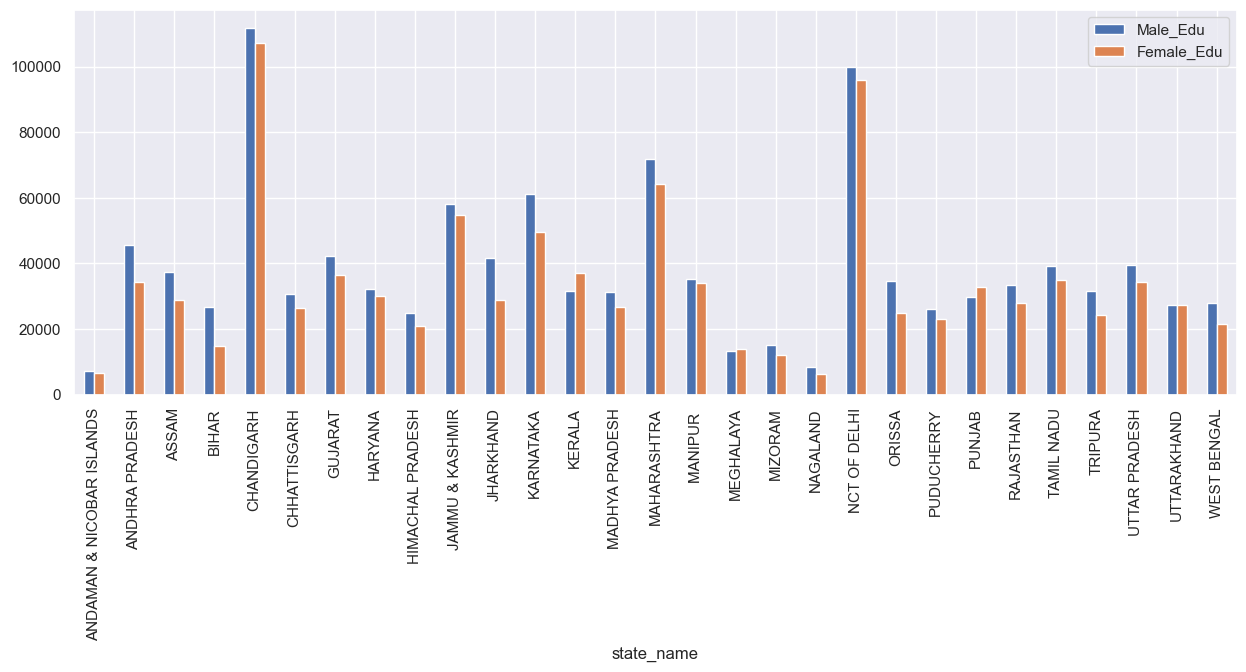

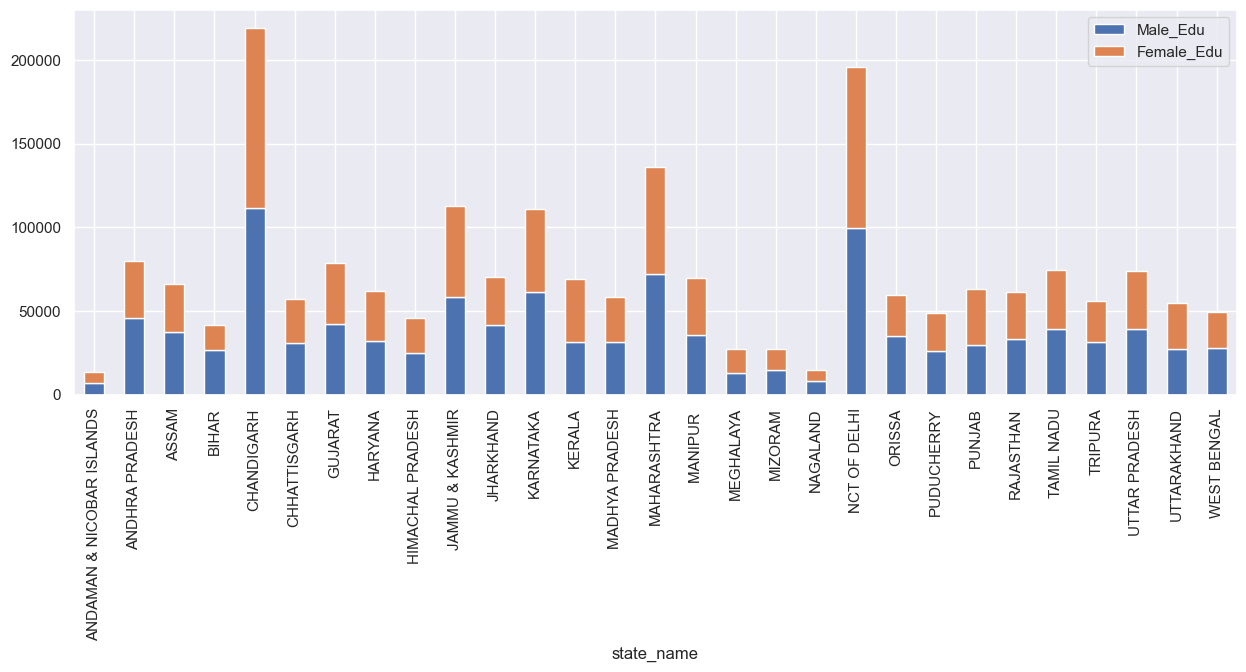

In [229]:
#Punjab,Kerala,Uttarakhand Female Grads conversion rate is higher than male 
df_plot_new_df = new_df[['Male_Edu','Female_Edu']]
#df_plot_new_df.plot.bar()
df_plot_new_df.plot(kind='bar', stacked=False, figsize=(15, 5))
df_plot_new_df.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.show()